In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as ply
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [5]:
file = pd.read_csv('Mall_Customers.csv')
file

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
file.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
missingValue = file.isnull().sum().sum()
if missingValue:
    print('There are missing values')
else:
    print('The data does not contain missing values')

The data does not contain missing values


In [9]:
# dimension of the data (nCol, nRow)
file.shape

(200, 5)

In [12]:
print(f'There are {file.shape[0]} customers and {file.shape[1]} basic information in the dataset')

There are 200 customers and 5 basic information in the dataset


##### Descriptive Statistics

In [65]:
# descriptive summary
file.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### Correlation Analysis

In [71]:
cor = file.corr(method='pearson')

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = cor.columns,
        y = cor.index,
        z = np.array(cor),
        colorscale = 'RdBu'
    )
)

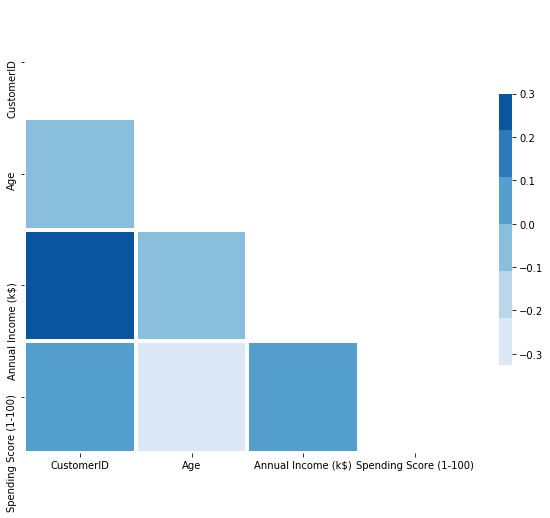

In [77]:
mask = np.triu(df.corr())
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("Blues")
sns.heatmap(cor,
            cmap=cmap,  
            mask=mask,
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )

In [13]:
# change column name 
# change 'Genre' to 'Gender'
file.rename(columns={'Genre':'Gender'},inplace=True)
# view the data after modifying it
file

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
fig = ply.bar(file, x='Gender', y="Annual Income (k$)", title='Gender vs Annual income', color='Gender')
fig.show()

In [32]:
df = file.query('Gender == "Male" and Age > 20')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13
15,16,Male,22,20,79
...,...,...,...,...,...
187,188,Male,28,101,68
192,193,Male,33,113,8
197,198,Male,32,126,74
198,199,Male,32,137,18


In [42]:
data = file[['Gender']]
data

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


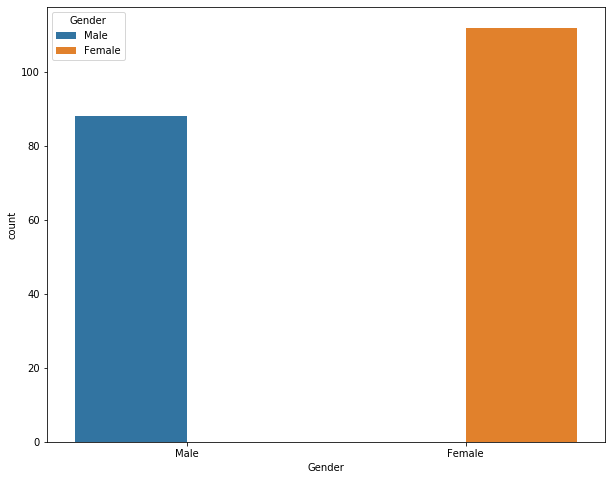

In [58]:
fig = plt.figure(figsize=(10,8))
sns.countplot('Gender', data=file, hue='Gender')
# fig.show()

In [50]:
fig = ply.box(file['Age'], title='Age distribution of customers')
fig.show()

In [81]:
fig = ply.box(file, 'Gender', 'Age', points='all', title='Age distribution based on Gender')
fig.update_traces(quartilemethod="inclusive")
fig.show()

In [64]:
fig = ply.scatter(file, 'Annual Income (k$)', 'Spending Score (1-100)', color='Gender', title="Annaul Income vs Spending Score")
fig.show()

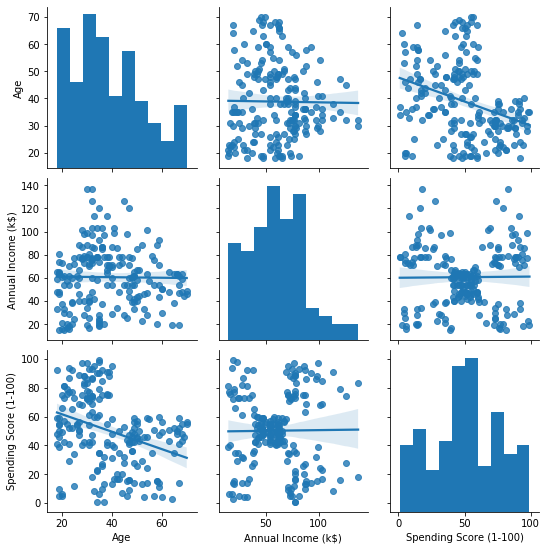

In [80]:
sns.pairplot(file.iloc[:,1:],kind='reg')

In [137]:
# creating the clusters
X = file.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


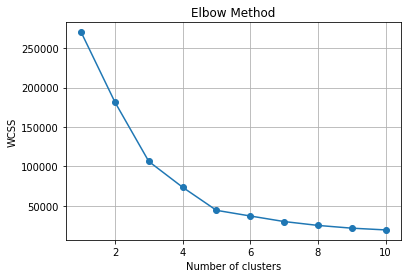

In [139]:
# generate the clusters
# get the score
def get_cluster(data):
    score = []

    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
        kmeans.fit(data)
        score.append(kmeans.inertia_)

    plt.plot(range(1,11), score, marker="o")
    plt.title('Elbow Method')
    plt.ylabel('WCSS')
    plt.xlabel('Number of clusters')
    plt.grid()
    plt.show()
    
get_cluster(X)

From the plot above, it is evident that the number of clusters to be used for this analysis is k = 5. Hence, we would fit the Kmeans clustering algorithm on the data.

In [140]:
# fit the KMeans on the data
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
ymeans = kmeans.fit_predict(X)
# view clusters 
ymeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [141]:
# append clusters to the datframe
df['Clusters'] = ymeans
df

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4


In [142]:
# centroids
centroids = kmeans.cluster_centers_
# X and y coordinates
centroid_x, centroid_y = centroids[:,0], centroids[:,1]

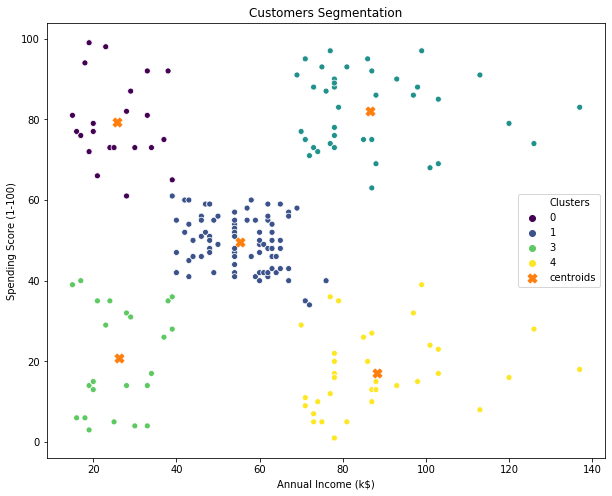

In [143]:
## view the clusters of customers based on annual income and spending score
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Clusters', data=df, palette='viridis')
plt.scatter(centroid_x, centroid_y, marker="X", s=80, label="centroids")
plt.title("Customers Segmentation")
plt.legend()
plt.show()


##### Apply Feature Scaling 

In [144]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(X)
new_df = pd.DataFrame(scale, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
new_df
                                      

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


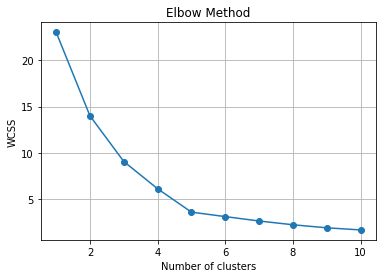

In [145]:
# call function to get cluster 
cluster = get_cluster(new_df)
cluster

In [146]:
# fit the KMeans on the data
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
ymeans = kmeans.fit_predict(new_df)
ymeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [147]:
# append cluster to the dataframe
new_df['cluster'] = ymeans
# view data after appending
new_df

,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,0.387755,4
1,0.000000,0.816327,3
2,0.008197,0.051020,4
3,0.008197,0.775510,3
4,0.016393,0.397959,4
...,...,...,...
195,0.860656,0.795918,1
196,0.909836,0.275510,0
197,0.909836,0.744898,1
198,1.000000,0.173469,0


In [148]:
# get centroids
centroids = kmeans.cluster_centers_
# X and y coordinates
centroid_x, centroid_y = centroids[:,0], centroids[:,1]

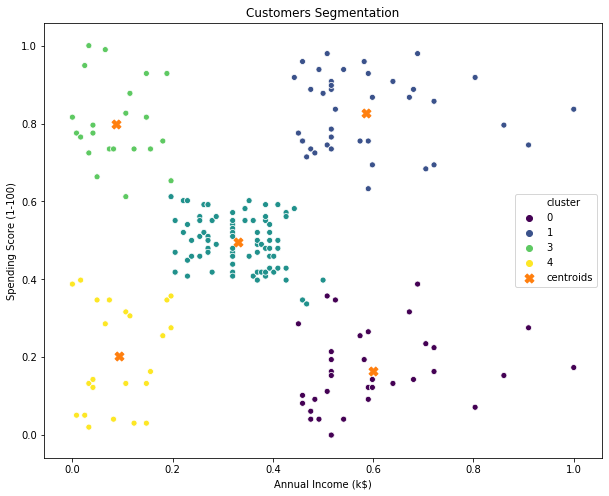

In [150]:
## view the clusters of customers based on annual income and spending score
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=new_df, palette='viridis')
plt.scatter(centroid_x, centroid_y, marker="X", s=80, label="centroids")
plt.title("Customers Segmentation")
plt.legend()
plt.show()